# Проект "Прогнозирование оттока клиентов фитнес-центра"

## Описание исследования:
На основании имеющихся данных о клиентах фитнес-центра нужно обучить модель для прогнозирования оттока клиентов в следующем месяце.

## Задачи исследования:
* Сформировать типичные портреты клиентов.
* Проанализировать основные признаки, наиболее сильно влияющие на отток.
* Обучить модель для прогнозирования оттока.
* Сформулировать основные выводы и составить рекомендации.

## План исследования:
1. Ознакомиться с предоставленными данными.
2. Провести предобработку данных.
3. Оценить имеющиеся для анализа показатели и, в случае необходимости, добавить новые.
4. Провести исследовательский анализ данных.
5. Обучить модель прогнозирования оттока клиентов с использованием нескольких алгоритмов машинного обучения и оценить качество моделей по метрикам.
6. Провести кластеризацию клиентов.
7. Сформулировать основные выводы и составить рекомендации.

## <a name="table_of_contents"></a> Структура проекта:
* 1. [Предобработка данных](#preprocessing)
    * 1.1. [Ознакомление с данными](#first_sight)
* 2. [Исследовательский анализ данных](#EDA)
    * 2.1. [Изучение признаков](#feature_analysis)
    * 2.2. [Графики распределения признаков](#feature_charts)
    * 2.3. [Корреляция признаков](#feature_corr)
* 3. [Модель прогнозирования оттока клиентов](#predictive_model_customer_churn)
    * 3.1. [Обучение модели алгоритмом: Логистическая регрессия](#logistic_regression_model)
    * 3.2. [Обучение модели алгоритмом: Случайный лес](#random_forest_classifier_model)
    * 3.3. [Сравнение моделей по метрикам](#model_metrics)
* 4. [Кластеризация клиентов](#clients_clusterization)
    * 4.1. [Стандартизация данных и построение матрицы расстояний](#data_standardization)
    * 4.2. [Обучение модели кластеризации алгоритмом: K-Means](#k_means_clusterization_model)
* 5. [Общий вывод](#conclusion)
    * 5.1. [Обзор проведенного анализа](#what_was_done)
    * 5.2. [Главные выводы](#main_conclusions)
    * 5.3. [Рекомендации](#recommendations)

## <a name="preprocessing"></a> Предобработка данных

### <a name="first_sight"></a> Ознакомление с данными

#### Описание переменных
- `Churn` - факт оттока в текущем месяце.
- `gender` - пол.
- `Near_Location` - проживание или работа в районе, где находится фитнес-центр.
- `Partner` - отрудник компании-партнёра клуба.
- `Promo_friends` - факт первоначальной записи в рамках акции «приведи друга».
- `Phone` - наличие контактного телефона.
- `Age` - возраст.
- `Lifetime` - ремя с момента первого обращения в фитнес-центр (в месяцах).
- `Contract_period` - длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год).
- `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах).
- `Group_visits` — факт посещения групповых занятий.
- `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента.
- `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц.
- `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
import warnings

In [2]:
# Улучшение качества отображения графиков
%config InlineBackend.figure_format = 'retina'

# Стиль графиков
sns.set_style('white')

# Максимальная длина строки для отображения в Pandas
pd.options.display.max_colwidth = 150

# Количество знаков после запятой
pd.options.display.float_format = '{:,.2f}'.format

# Обработка предупреждений при построении графиков с датами
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

warnings.filterwarnings("ignore")

In [3]:
# Чтение данных
path = 'gym_churn.csv'
df = pd.read_csv(path)

df.sample(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
478,0,1,0,0,1,1,1,28,65.93,1.00,1,2.03,1.69,1
1534,0,1,1,1,1,12,1,26,42.54,7.00,6,2.20,2.26,0
334,0,1,0,0,1,1,0,25,70.57,1.00,1,1.11,0.72,1
2009,0,0,1,0,1,12,0,26,135.25,12.00,5,0.00,0.00,0
30,0,1,1,0,1,1,1,32,44.67,1.00,1,1.77,1.69,0
2063,0,1,1,0,1,12,0,32,488.71,12.00,2,1.07,1.07,0
107,0,1,1,1,1,12,1,34,114.96,9.00,1,2.64,2.49,0
2742,0,1,0,1,1,1,1,31,198.10,1.00,2,2.49,2.45,0
3898,1,1,1,0,1,12,0,30,114.26,12.00,10,1.27,1.53,0
1086,0,1,1,1,1,12,1,31,318.83,8.00,14,3.17,3.09,0


In [4]:
# Общая информация о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
# Проверим на дубликаты
df.duplicated().sum()

0

In [6]:
# Приведем названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

#### Найденные артефакты в данных:
Предоставленные данные достаточно чистые - не содержат пропусков и дубликатов. Необходимости в измении данных также нет.

[Вернуться к оглавлению](#table_of_contents)

## <a name="EDA"></a> Исследовательский анализ данных

### <a name="feature_analysis"></a> Изучение признаков

In [7]:
# Изучим описательные статистики каждого признака
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,"4,000.00",0.51,0.50,0.00,0.00,1.00,1.00,1.00
near_location,"4,000.00",0.85,0.36,0.00,1.00,1.00,1.00,1.00
partner,"4,000.00",0.49,0.50,0.00,0.00,0.00,1.00,1.00
promo_friends,"4,000.00",0.31,0.46,0.00,0.00,0.00,1.00,1.00
phone,"4,000.00",0.90,0.30,0.00,1.00,1.00,1.00,1.00
contract_period,"4,000.00",4.68,4.55,1.00,1.00,1.00,6.00,12.00
group_visits,"4,000.00",0.41,0.49,0.00,0.00,0.00,1.00,1.00
age,"4,000.00",29.18,3.26,18.00,27.00,29.00,31.00,41.00
avg_additional_charges_total,"4,000.00",146.94,96.36,0.15,68.87,136.22,210.95,552.59
month_to_end_contract,"4,000.00",4.32,4.19,1.00,1.00,1.00,6.00,12.00


#### Аномальные данные в признаках отсутствуют. Для признаков, содержащих бинарные значения, медиана и среднее значение практически не отличаются - значит, распределение признаков близко к нормальному.

In [8]:
# Посмотрим на средние значения признаков, разделив набор данных на группы по признаку оттока
df.groupby('churn').mean().reset_index().T

,0,1
churn,0.00,1.00
gender,0.51,0.51
near_location,0.87,0.77
partner,0.53,0.36
promo_friends,0.35,0.18
phone,0.90,0.90
contract_period,5.75,1.73
group_visits,0.46,0.27
age,29.98,26.99
avg_additional_charges_total,158.45,115.08


### Вывод:
1. Среди клиентов, являющихся <b>сотрудниками компаний-партнёров</b> 35% перестали пользоваться услугами фитнес-центра, но 53% продолжили посещать центр.
2. Среди клиентов, привлеченных акцией <b>"приведи друга" 18%</b> перестали пользоваться услугами фитнес-центра, <b>35% продолжили посещать центр.</b>
3. Для ушедших клиентов <b>средняя длительность абонемента</b> составляла 1.73 месяца, для оставшихся клиентов - 5.75 месяцев.
4. Среди ушедших клиентов, <b>групповые занятия</b> посещали 27%, а среди оставшихся - 46%.
5. <b>Суммарная выручка от других услуг</b> для ушедших клиентов составила 115 тысяч, для оставшихся - 158 тысяч, что на 27% больше.
6. <b>Средний срок до окончания текущего абонемента</b> для ушедших клиентов составил 1.6 месяцев, для оставшихся - 5.3 месяцев.
7. <b>Среднее время с момента первого обращения</b> для ушедших клиентов составило 1 месяц, для оставшихся - 4.7 месяцев.
8. <b>Средняя частота посещений в неделю за все время</b> для ушедших клиентов составила 1.5 посещения в неделю, для оставшихся - 2 посещения в неделю.
9. <b>Средняя частота посещений в неделю за предыдущий месяц</b> для ушедших клиентов составила 1 посещение в неделю, для оставшихся - 2 посещения в неделю.

[Вернуться к оглавлению](#table_of_contents)

### <a name="feature_charts"></a> Графики распределения признаков

In [9]:
# Создаем новые датасеты для групп клиентов
# Удаляем признаки, которые не отличаются в двух группах
df_churn_true = df.query('churn == 1').drop(['churn', 'gender', 'phone', 'near_location'], axis = 1)
df_churn_false = df.query('churn == 0').drop(['churn', 'gender', 'phone', 'near_location'], axis = 1)

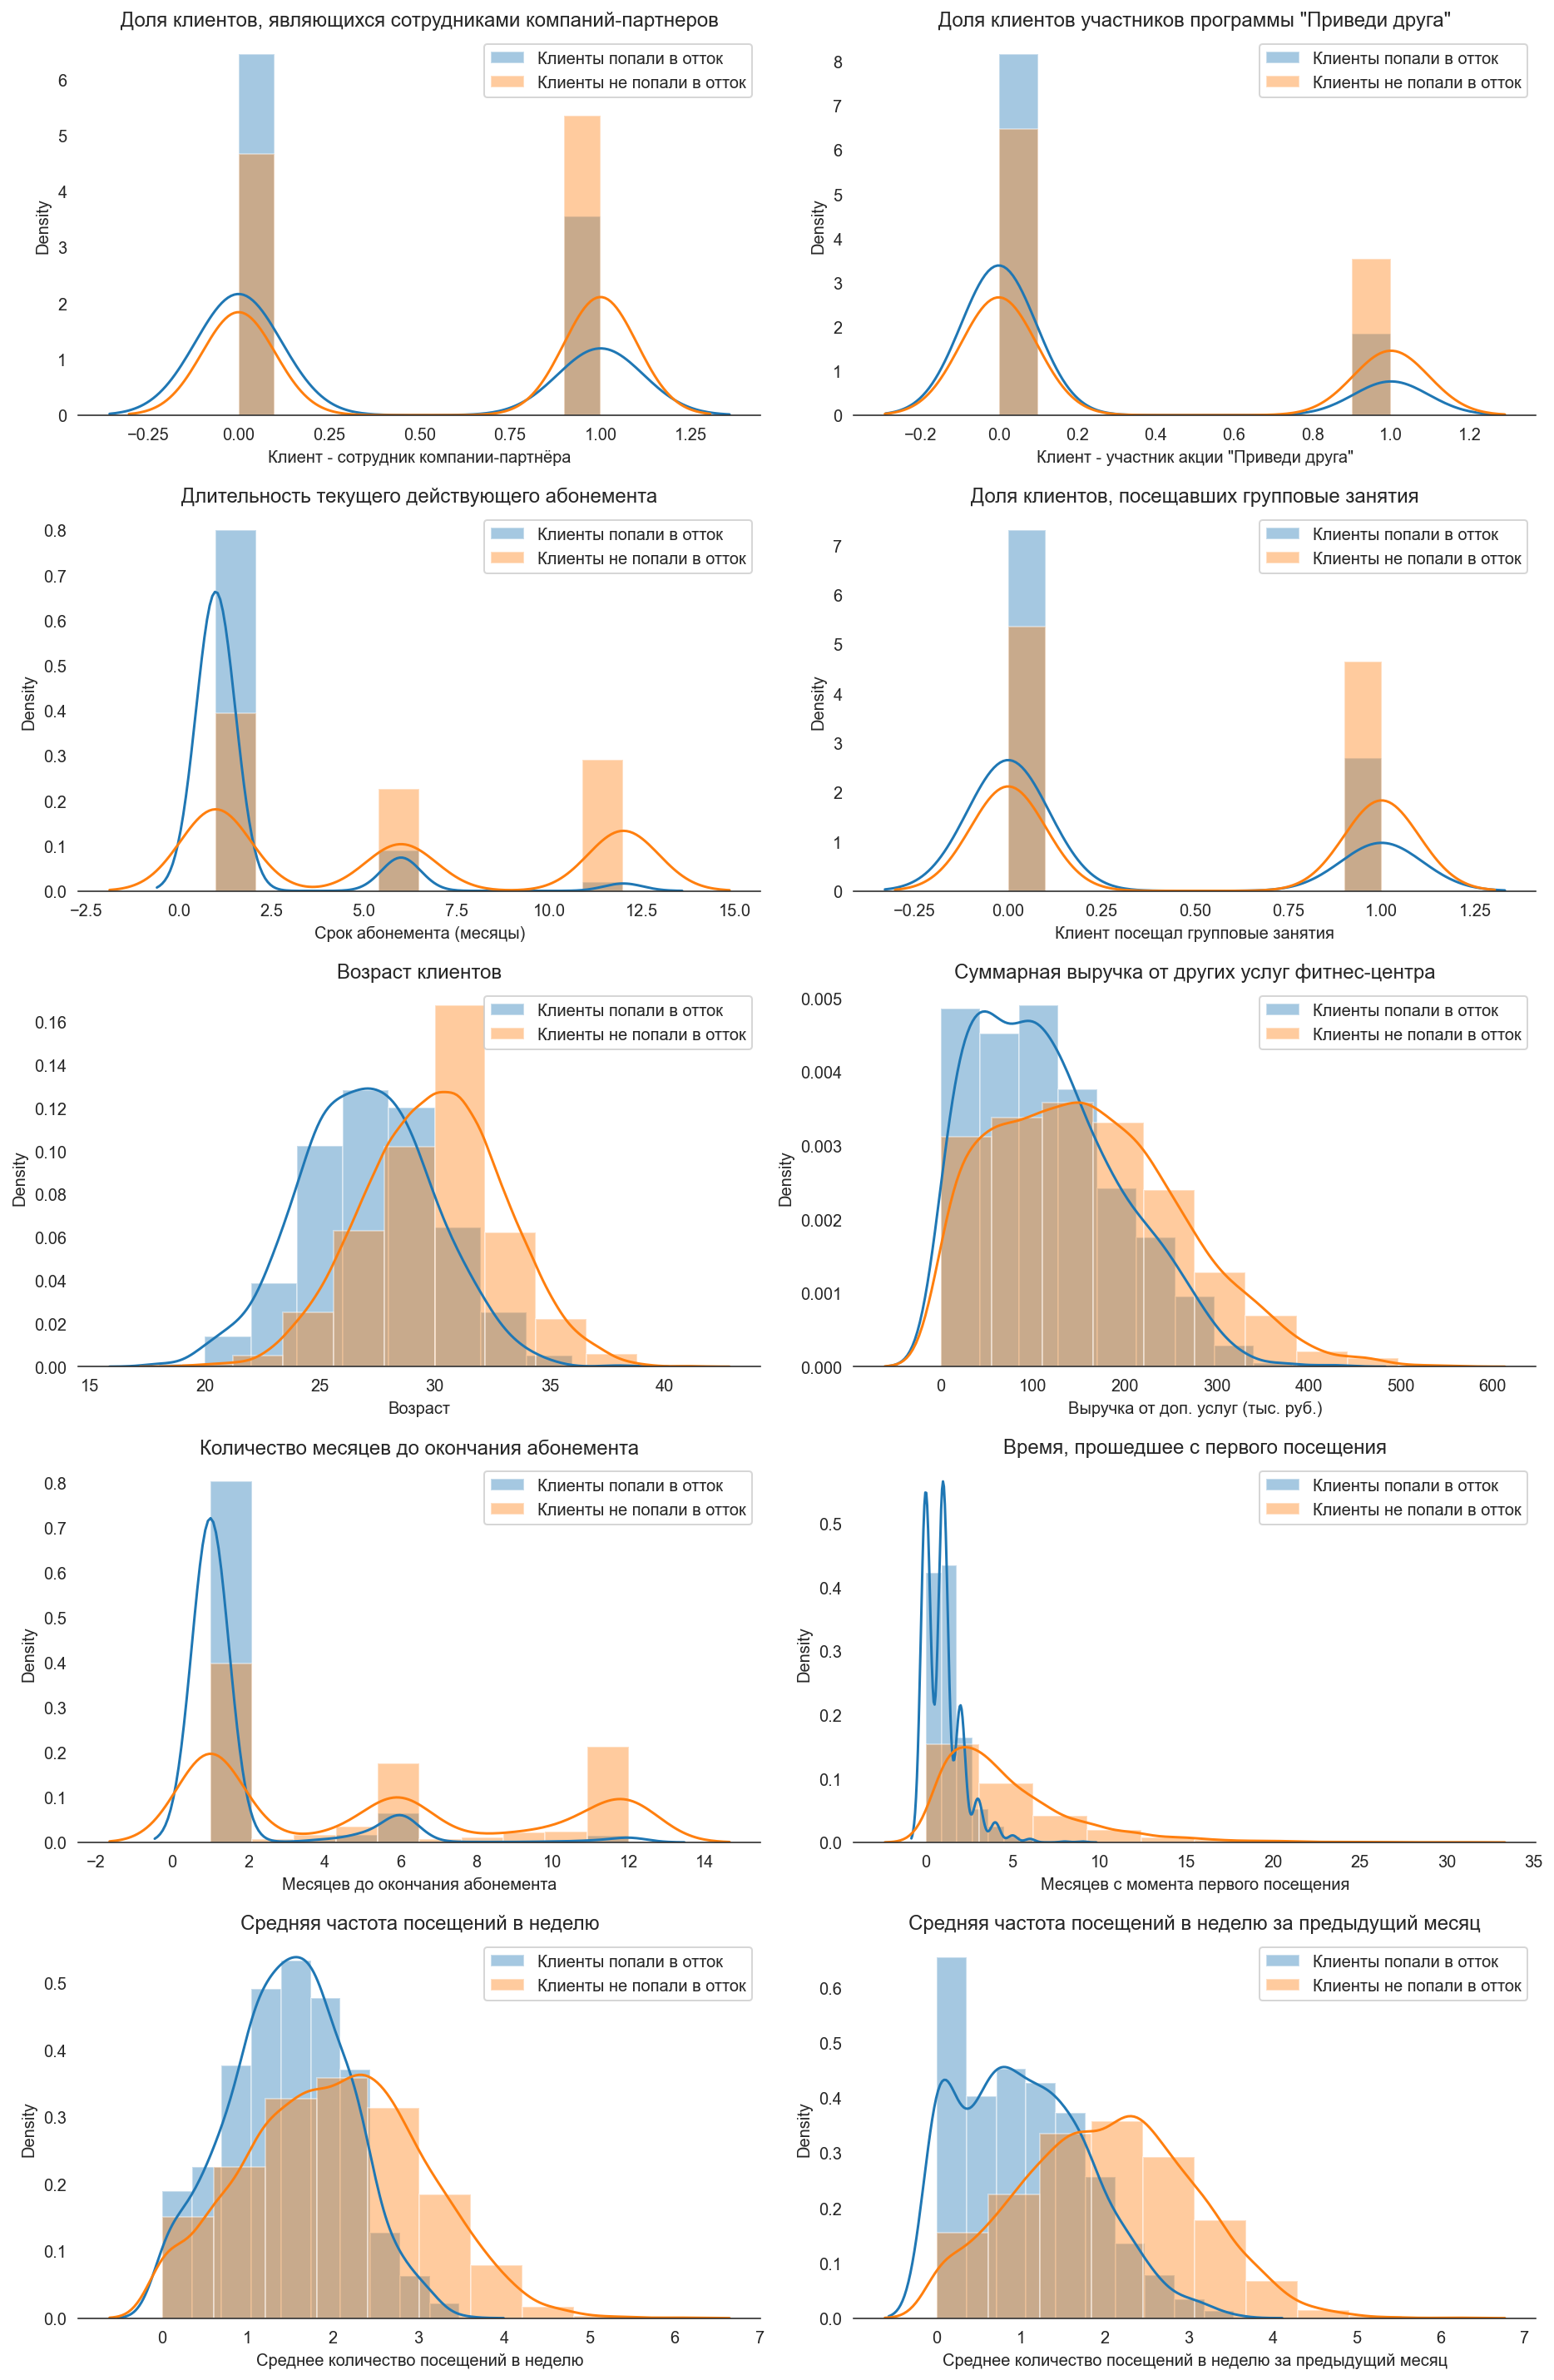

In [10]:
title_list = ['Доля клиентов, являющихся сотрудниками компаний-партнеров', 'Доля клиентов участников программы "Приведи друга"',
             'Длительность текущего действующего абонемента', 'Доля клиентов, посещавших групповые занятия', 'Возраст клиентов',
             'Суммарная выручка от других услуг фитнес-центра', 'Количество месяцев до окончания абонемента',
             'Время, прошедшее с первого посещения', 'Средняя частота посещений в неделю', 
              'Средняя частота посещений в неделю за предыдущий месяц']
# Задаем подписи данных
label_list = ['Клиент - сотрудник компании-партнёра', 'Клиент - участник акции "Приведи друга"', 'Срок абонемента (месяцы)',
             'Клиент посещал групповые занятия', 'Возраст', 'Выручка от доп. услуг (тыс. руб.)', 'Месяцев до окончания абонемента',
             'Месяцев с момента первого посещения', 'Среднее количество посещений в неделю', 
              'Среднее количество посещений в неделю за предыдущий месяц']

features = df_churn_true.columns

# Создаем график распределения для каждого признака

fig, axes = plt.subplots(5, 2, figsize=(13, 20))
plt.subplots_adjust(hspace=100)
sns.despine(left=True)

count = 0  # Счетчик для сопоставления признака с названием графика и подписью для оси X

for row in range(0, 5):
    for col in range(0, 2):
        sns.distplot(df_churn_true[features[count]], bins = 10, label='Клиенты попали в отток', norm_hist=False, ax=axes[row, col])
        sns.distplot(df_churn_false[features[count]], bins = 10, label='Клиенты не попали в отток', norm_hist=False, ax=axes[row, col])

        plt.setp(axes[row, col], title=title_list[count])
        plt.setp(axes[row, col], xlabel=label_list[count])
        axes[row, col].legend(loc="upper right")
        
        count += 1

plt.tight_layout()
plt.show()

### Вывод:
1. Большинство клиентов, попавших в отток, не являлись сотрудниками компаний-партнеров.
2. Большинство клиентов, попавших в отток, не участвовали в программе "Приведи друга".
3. У клиентов, попавших в отток, средняя продолжительность действия абонемента составляла менее трех месяцев.
4. Большинство клиентов, попавших в отток, не посещали групповые занятия.
5. Средний возраст клиентов, попавших в отток, составил 27 лет.
6. Выручка от прочих услуг фитнес-центра выше у клиентов, не попавших в отток.
7. Срок до окончания абонемента у клиентов, попавших в отток, составляет 1 месяц.
8. Клиенты, попавшие в отток, посещали фитнес-центр около 2 месяцев.
9. Средняя частота посещений в неделю для клиентов, попавших в отток, составила 1,5 посещения в неделю.
10. Аналогичная ситуация с посещениями за предыдущий месяц.

[Вернуться к оглавлению](#table_of_contents)

### <a name="feature_corr"></a> Корреляция признаков

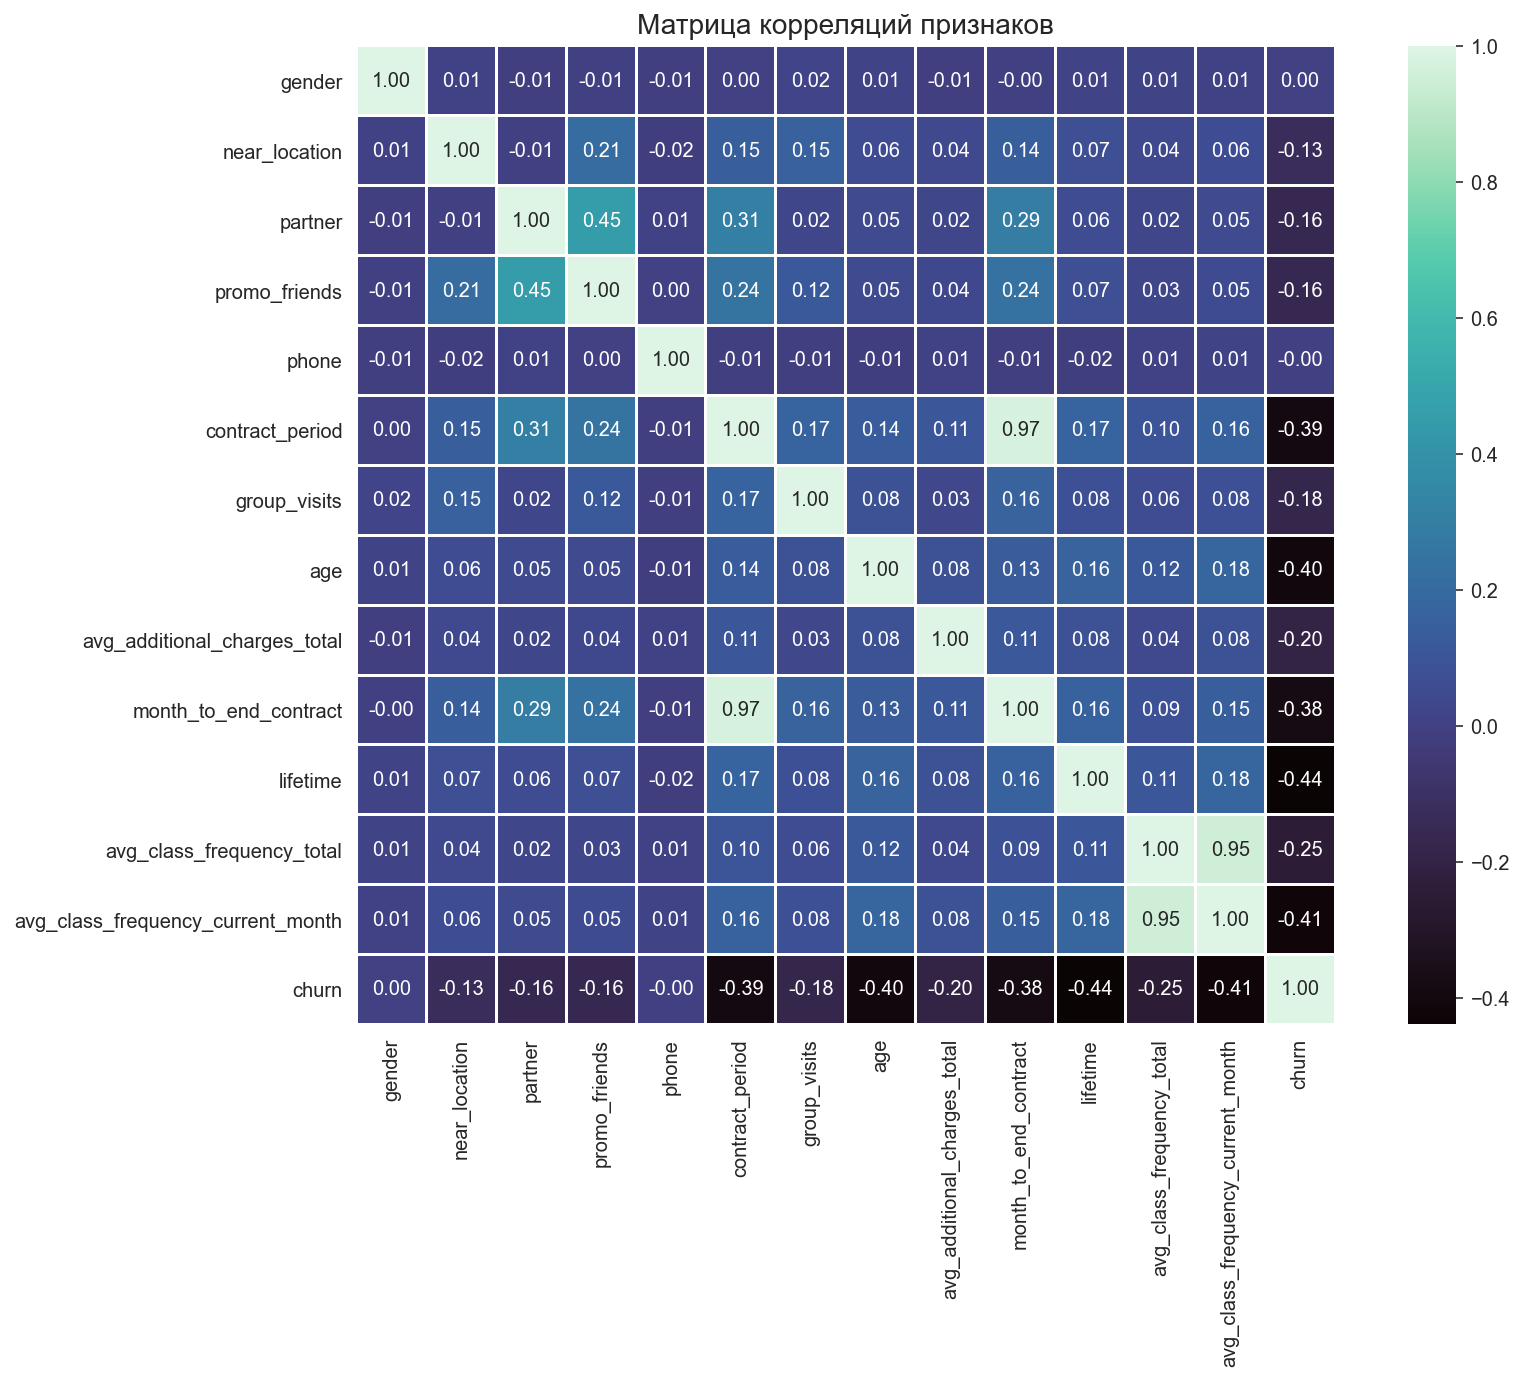

In [11]:
# Вычисляем корреляцию признаков
corr_m = df.corr()

# Строим график
plt.figure(figsize = (13, 9))
plt.title('Матрица корреляций признаков', fontsize=14)
sns.heatmap(corr_m, square=True, annot=True, fmt='.2f', linewidths=1, linecolor='white', cmap='mako')
plt.show()

### Вывод:
Наиболее высокие коэффициенты по модулю у признаков:
1. <b>lifetime</b> (Время с момента первого обращения в фитнес-центр)
2. <b>avg_class_frequency_current_month</b> (Средняя частота посещений в неделю за предыдущий месяц)
3. <b>age</b> (Возраст клиента)
4. <b>contract_period</b> (Длительность текущего действующего абонемента)
5. <b>month_to_end_contract</b> (Срок до окончания текущего действующего абонемента)

Мультиколлинеарные признаки:
* contract_period & month_to_end_contract
* avg_class_frequency_current_month & avg_class_frequency_total

[Вернуться к оглавлению](#table_of_contents)

## <a name="predictive_model_customer_churn"></a> Модель прогнозирования оттока клиентов

#### Задача прогноза оттока клиентов это задача бинарной классификации, поэтому для построения прогноза используем логистическую регрессию и ансамбль моделей случайный лес.

In [12]:
# Избавимся от мультиколлинеарности, удалив один из признаков
df = df.drop(['month_to_end_contract', 'avg_class_frequency_current_month'], axis=1)

### <a name="logistic_regression_model"></a> Обучение модели алгоритмом: Логистическая регрессия

In [13]:
# Формируем матрицу признаков и целевую переменную
X = df.drop('churn', axis = 1)
y = df['churn']

# Формируем обучающие и валидационные выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [14]:
# Создаем модель
log_reg_model = LogisticRegression(random_state=0)

grid_parametrs = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                 'penalty': ['l1', 'l2', 'elasticnet', 'None'],
                 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Оптимизируем модель с помощью кросс-валидированного поиска гиперпараметров
grid = GridSearchCV(log_reg_model, grid_parametrs)
grid.fit(X_train, y_train)

# Результат оптимизации
grid.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

In [15]:
# Создаем модель
log_reg_model = LogisticRegression(random_state=0, C=1, penalty='l1', solver='liblinear')

# Обучаем модель
log_reg_model.fit(X_train, y_train)

# Строим прогноз
log_reg_predictions = log_reg_model.predict(X_test)

#### Модель логистической регрессии обучена, переходим к обучению модель алгоритмом случайный лес.

[Вернуться к оглавлению](#table_of_contents)

### <a name="random_forest_classifier_model"></a> Обучение модели алгоритмом: Случайный лес

In [16]:
# Создаем модель
r_forest_model = RandomForestClassifier(random_state=0)

grid_parametrs = {'n_estimators': range(10, 51, 10),
                  'max_depth': range(1, 13, 2),
                  'min_samples_leaf': range(1, 8),
                  'min_samples_split': range(2, 10, 2)}

# Оптимизируем модель с помощью кросс-валидированного поиска гиперпараметров
grid = GridSearchCV(r_forest_model, grid_parametrs)
grid.fit(X_train, y_train)

# Результат оптимизации
grid.best_params_

{'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [17]:
# Создаем модель
r_forest_model = RandomForestClassifier(n_estimators=50, max_depth=7, max_features=10, min_samples_leaf=1, min_samples_split=2,
                                        random_state=0)

# Обучаем модель
r_forest_model.fit(X_train, y_train)

# Строим прогноз
r_forest_predictions = r_forest_model.predict(X_test)

#### Модель логистической регрессии обучена, переходим к оценке метрик.

[Вернуться к оглавлению](#table_of_contents)

### <a name="model_metrics"></a> Сравнение моделей по метрикам

#### Для сравнения качества прогноза каждой модели используем метрики:
* Accuracy - доля правильных ответов.
* Precision - точность.
* Recall - полнота.
* F1 - точность и полнота.

In [18]:
# Расчитаем метрики для каждой модели
models = ['Логистическая регрессия', 'Случайный лес']
predictions = [log_reg_predictions, r_forest_predictions]
metrics = [accuracy_score, precision_score, recall_score, f1_score]

count = 0
for model in models:
    print('Модель:', model)
    print(' Accuracy:{:.2f}\n Precision:{:.2f}\n Recall:{:.2f}\n F1:{:.2f}\n AUC-ROC:{:.2f}\n' \
          .format(accuracy_score(y_test, predictions[count]), precision_score(y_test, predictions[count]), 
                  recall_score(y_test, predictions[count]), f1_score(y_test, predictions[count]), 
                  roc_auc_score(y_test, predictions[count])))
    count += 1

Модель: Логистическая регрессия
 Accuracy:0.90
 Precision:0.82
 Recall:0.81
 F1:0.82
 AUC-ROC:0.87

Модель: Случайный лес
 Accuracy:0.89
 Precision:0.82
 Recall:0.77
 F1:0.79
 AUC-ROC:0.86



### Вывод:
Модель, обученная алгоритмом <b>Логистическая регрессия</b> показывает более высокие показатели метрик `F1` и `AUC-ROC`, чем модель Случайный лес. Метрика `Recall` также выше у первой модели. В остальных метриках модели практически не отличаются.

[Вернуться к оглавлению](#table_of_contents)

## <a name="clients_clusterization"></a> Кластеризация клиентов

### <a name="data_standardization"></a> Стандартизация данных и построение матрицы расстояний

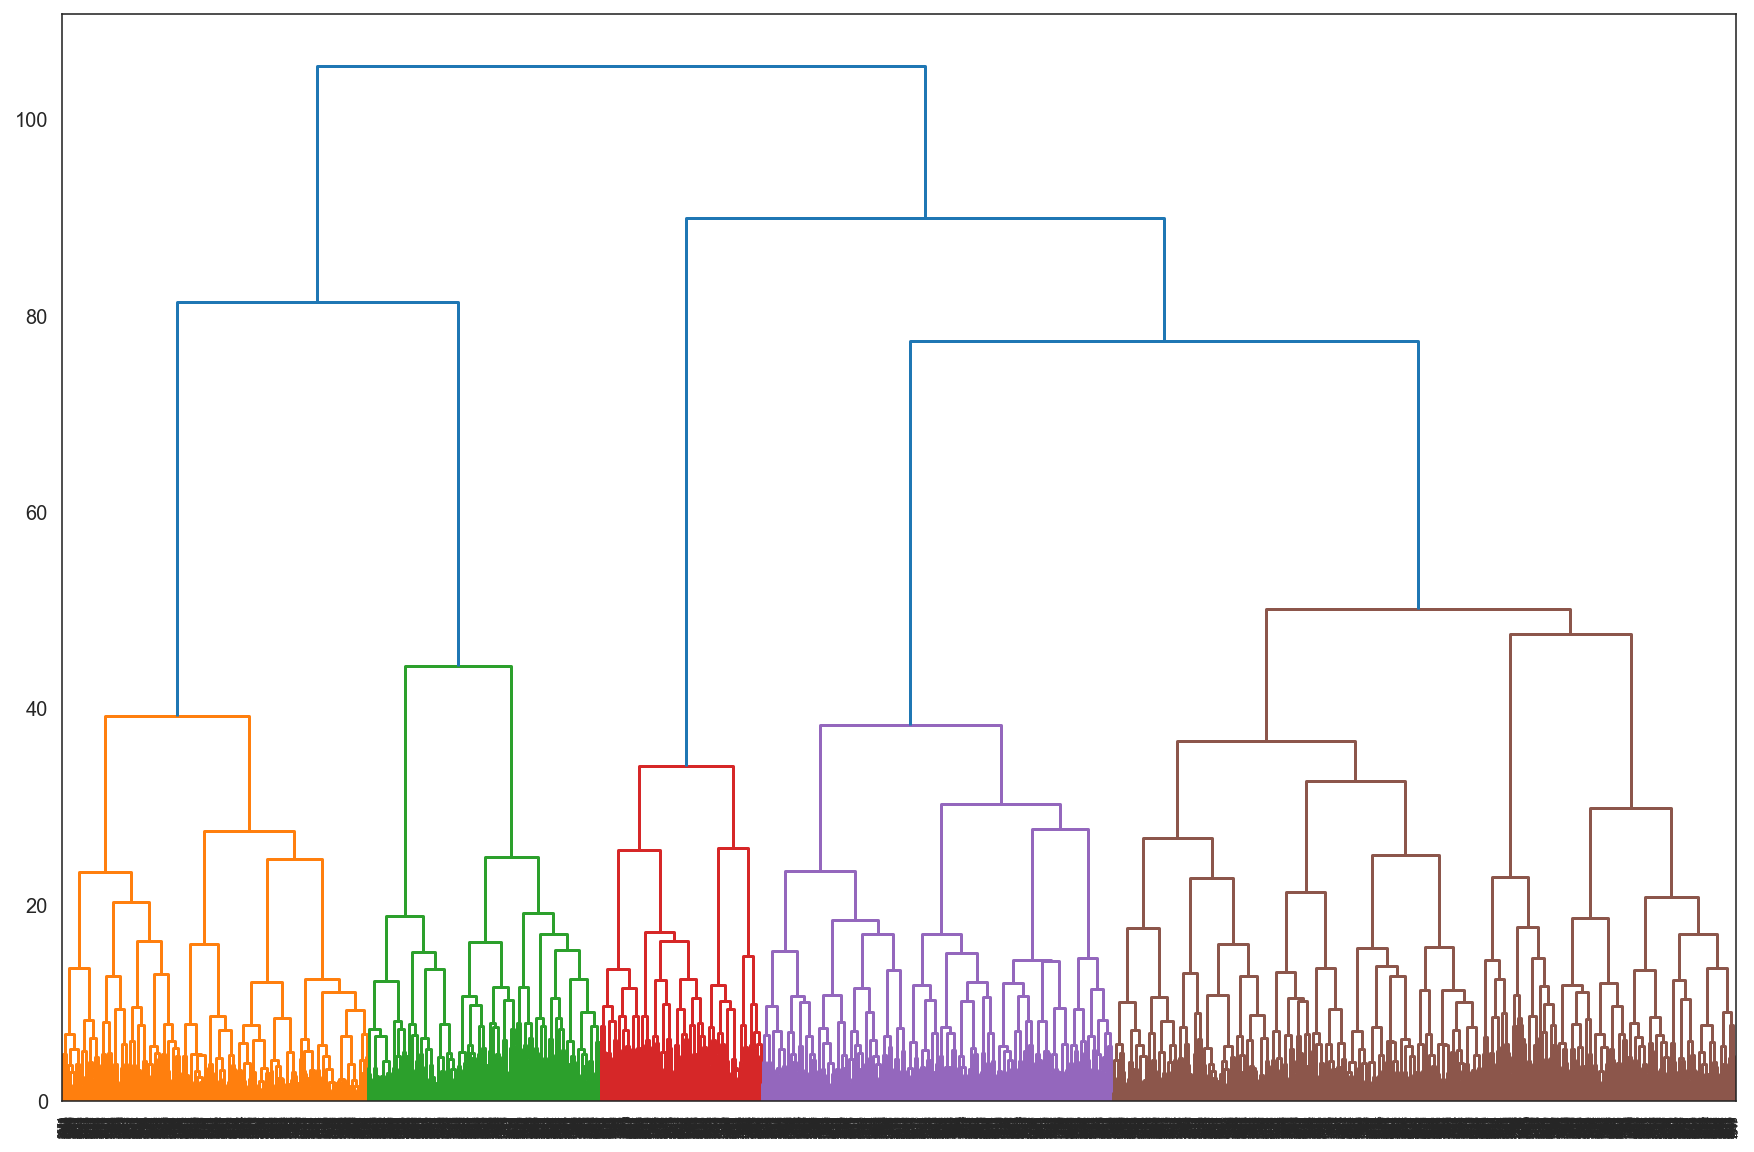

In [19]:
# Создаем нормализатор
scaler = StandardScaler()

#  Обучаем scaler и одновременно трансформируем матрицу для обучающей выборки
X_standardized = scaler.fit_transform(df)

# Рисуем дендрограмму
linked = linkage(X_standardized, method = 'ward')

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show()

### Вывод:
На основании созданной дендрограммы можно сделать вывод, что стандартную матрицу признаков можно разделить на 5 кластеров.

[Вернуться к оглавлению](#table_of_contents)

### <a name="k_means_clusterization_model"></a> Обучение модели кластеризации алгоритмом: K-Means

In [20]:
# Создаем нормализатор
scaler = StandardScaler()

# Обучаем scaler и одновременно трансформируем матрицу для обучающей выборки
X_standardized = scaler.fit_transform(df.drop('churn', axis = 1))

km = KMeans(n_clusters = 5)

km_clusters = km.fit_predict(X_standardized)  # применяем алгоритм к данным и формируем вектор кластеров

In [21]:
# Присвоим значения полученных кластеров оригинальному набору данных
df['cluster'] = km_clusters

df.sample(10)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn,cluster
1871,1,0,0,0,1,1,0,29,115.21,2,1.68,0,2
1462,1,1,1,1,1,6,0,29,122.54,1,2.92,0,1
1147,0,0,0,0,1,1,1,33,245.06,8,1.69,0,2
2950,1,1,0,0,1,1,1,26,67.26,3,2.47,0,3
2303,1,0,0,0,1,1,0,30,257.43,1,2.15,1,2
2041,0,0,0,0,1,1,0,28,180.62,1,2.63,0,2
2282,0,1,0,0,1,1,1,30,42.25,2,1.64,0,3
2753,1,1,0,0,1,1,0,27,178.70,2,1.43,0,4
2210,0,1,1,1,1,1,1,33,21.03,3,4.01,0,1
628,0,1,1,1,1,1,1,22,227.36,1,2.42,1,1


In [22]:
# Сгруппируем данные по кластеру и выведем средние значения
df.groupby('cluster').mean().T

cluster,0,1,2,3,4
gender,0.52,0.49,0.50,0.55,0.51
near_location,0.86,1.00,0.00,1.00,1.00
partner,0.47,0.95,0.49,0.25,0.27
promo_friends,0.31,0.93,0.08,0.08,0.06
phone,0.00,1.00,1.00,1.00,1.00
contract_period,4.78,7.46,3.03,4.55,3.14
group_visits,0.43,0.48,0.24,1.00,0.00
age,29.30,29.60,28.72,29.55,28.74
avg_additional_charges_total,144.21,157.76,137.54,147.67,142.47
lifetime,3.94,4.50,3.06,3.71,3.31


### Вывод:
Наиболее высокий отток клиентов у кластеров №3 и №4. В эти кластеры попали клиенты с небольшими сроками абонементов, редко посещающие групповые занятия, с момента приобритения абонгемента прошло не более 3 месяцев.

#### Визуализируем распределение признаков в каждом кластере.

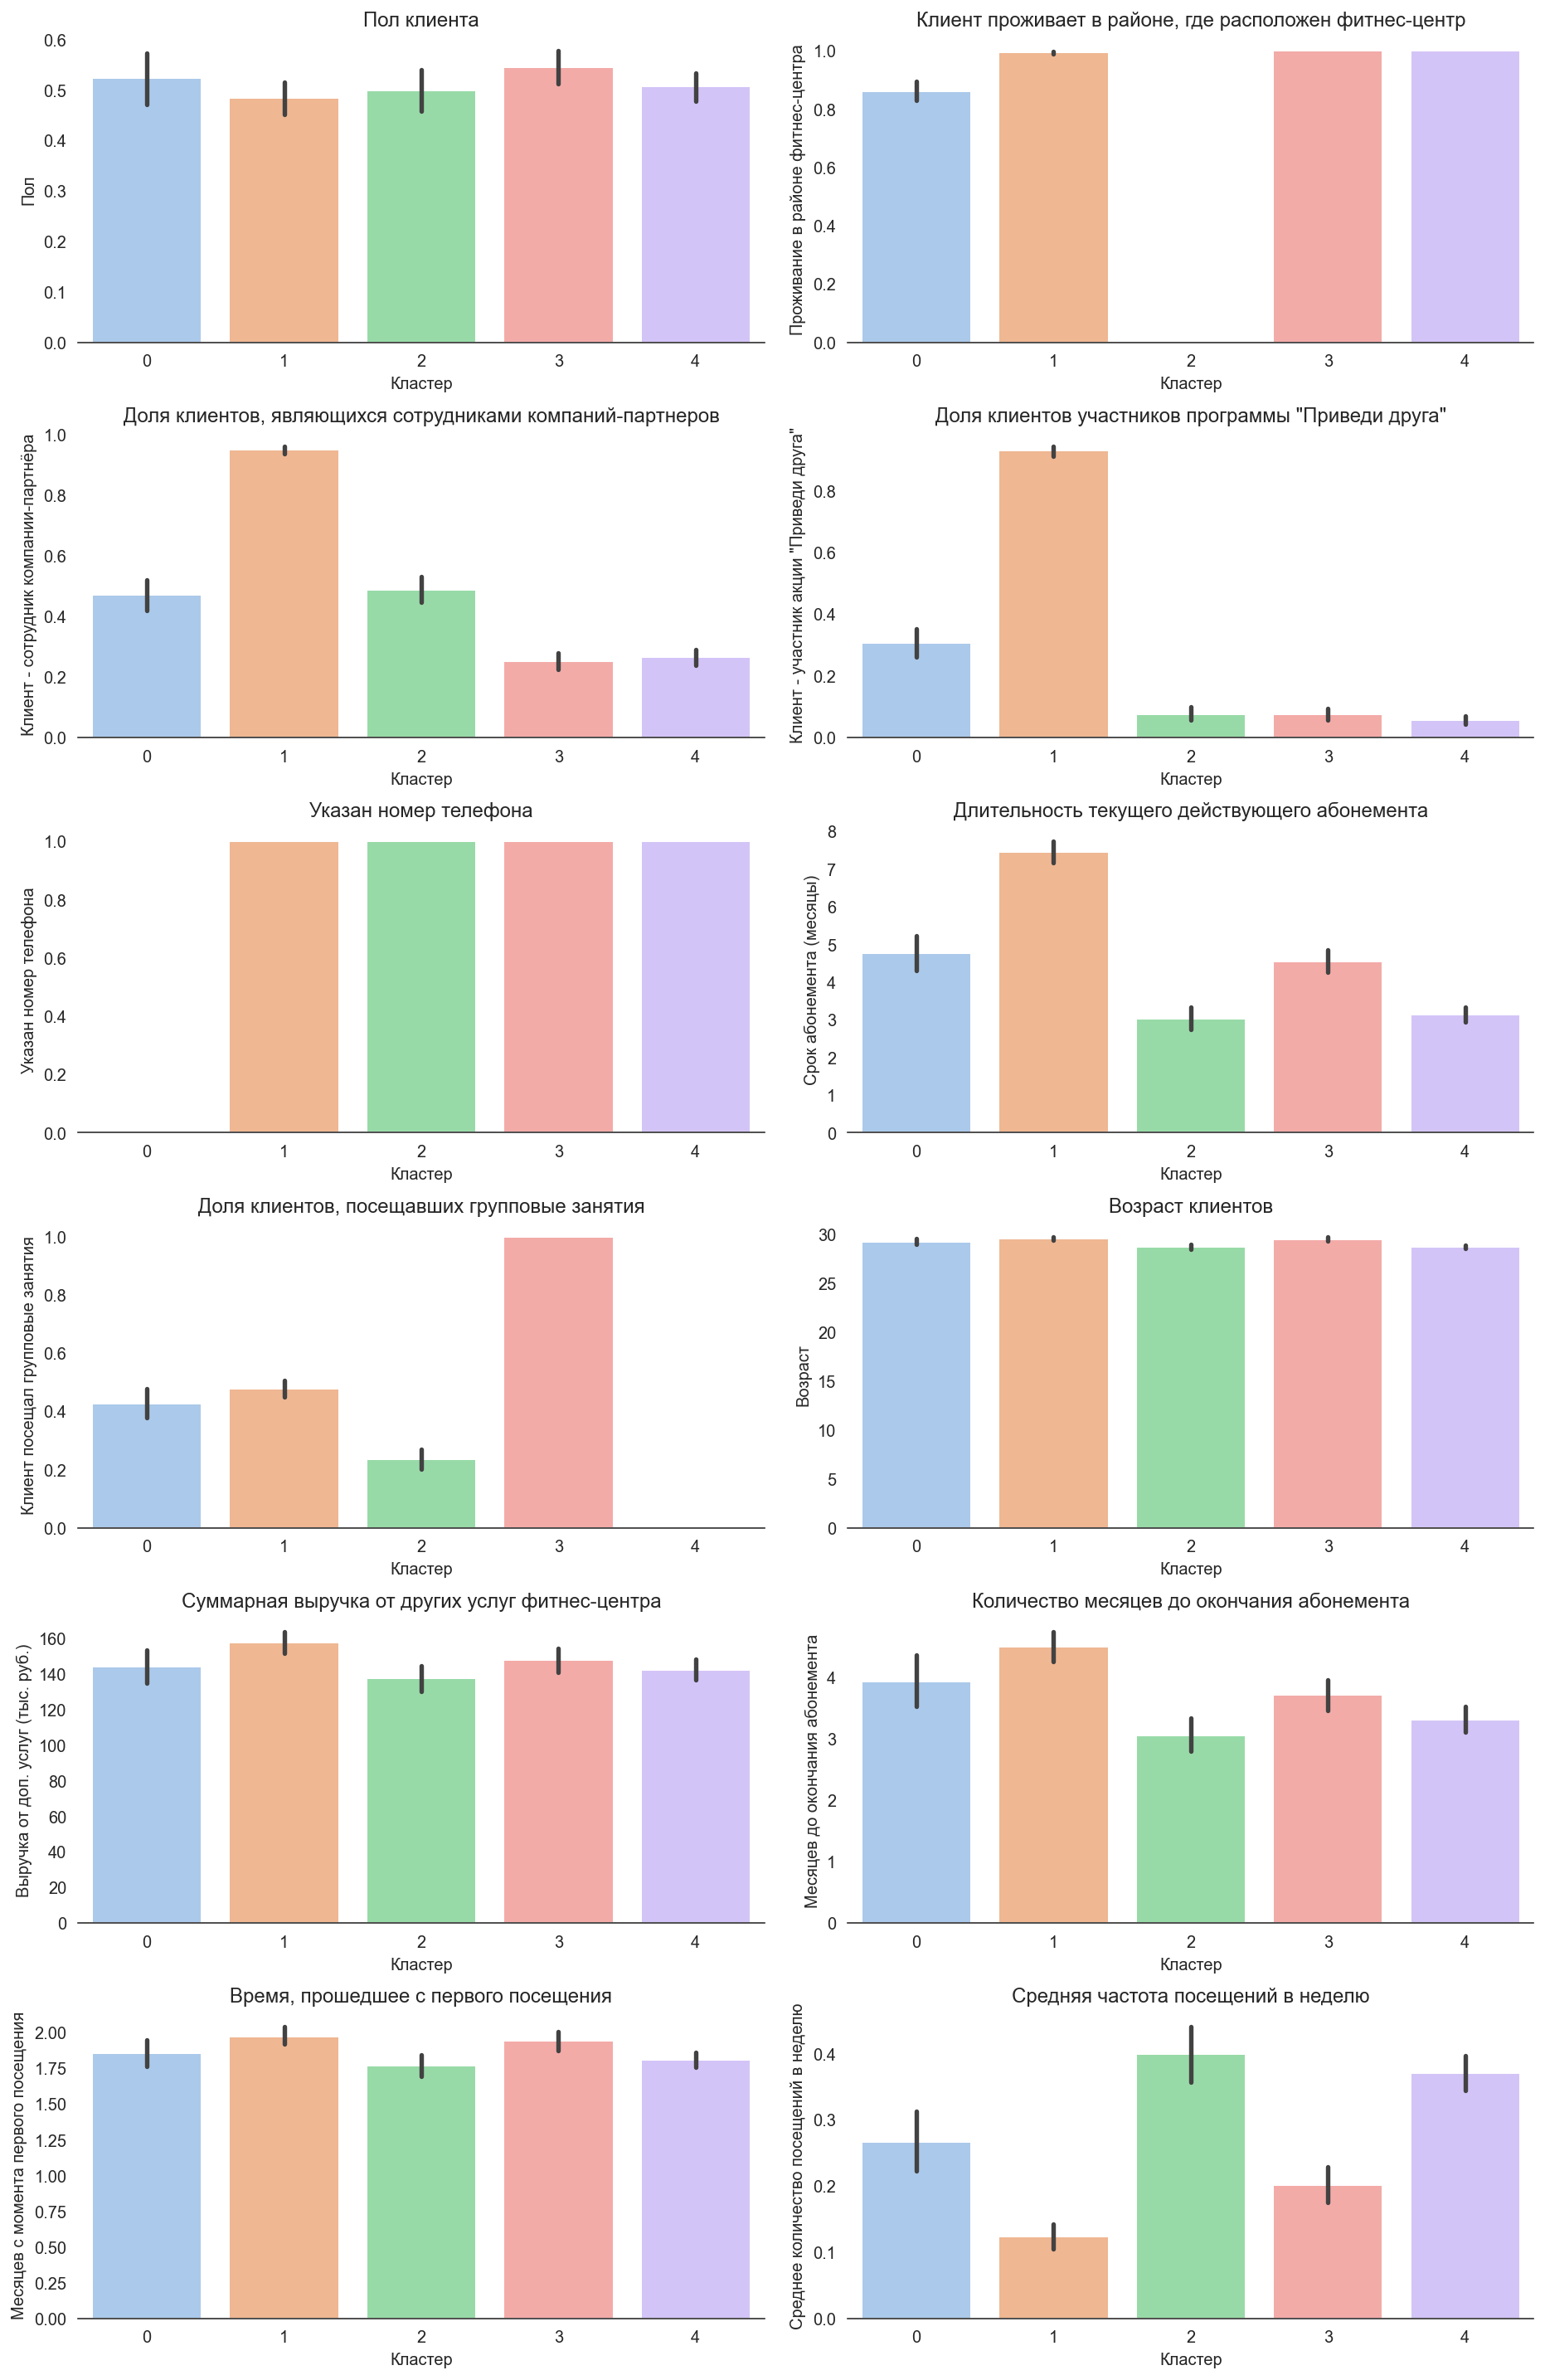

In [23]:
title_list = ['Пол клиента', 'Клиент проживает в районе, где расположен фитнес-центр', 
              'Доля клиентов, являющихся сотрудниками компаний-партнеров', 'Доля клиентов участников программы "Приведи друга"',
              'Указан номер телефона', 'Длительность текущего действующего абонемента', 
              'Доля клиентов, посещавших групповые занятия', 'Возраст клиентов',
             'Суммарная выручка от других услуг фитнес-центра', 'Количество месяцев до окончания абонемента',
             'Время, прошедшее с первого посещения', 'Средняя частота посещений в неделю', 
              'Средняя частота посещений в неделю за предыдущий месяц', 'Отток клиентов']

# Задаем подписи данных
label_list = ['Пол', 'Проживание в районе фитнес-центра', 'Клиент - сотрудник компании-партнёра', 
              'Клиент - участник акции "Приведи друга"', 'Указан номер телефона', 'Срок абонемента (месяцы)',
             'Клиент посещал групповые занятия', 'Возраст', 'Выручка от доп. услуг (тыс. руб.)', 
              'Месяцев до окончания абонемента', 'Месяцев с момента первого посещения', 'Среднее количество посещений в неделю', 
              'Среднее количество посещений в неделю за предыдущий месяц', 'Факт оттока клиентов']

features = df.columns[:-1]

# Создаем график распределения для каждого признака

fig, axes = plt.subplots(6, 2, figsize=(13, 20))
plt.subplots_adjust(hspace=200)
sns.despine(left=True)

count = 0  # Счетчик для сопоставления признака с названием графика и подписью для оси X

for row in range(0, 6):
    for col in range(0, 2):
        sns.barplot(x='cluster', y=features[count], data=df, palette='pastel', ax=axes[row, col])

        plt.setp(axes[row, col], title=title_list[count], ylabel=label_list[count], xlabel='Кластер')
        
        count += 1

plt.tight_layout()
plt.show()

In [24]:
# Найдем долю оттока для каждого кластера
df_churn = df.groupby('cluster').mean().reset_index()[['cluster', 'churn']]
df_churn['churn_ratio'] = round(df_churn['churn'] * 100, 2)
df_churn[['cluster', 'churn_ratio']]

,cluster,churn_ratio
0,0,26.68
1,1,12.35
2,2,39.93
3,3,20.14
4,4,37.03


### Вывод:
1. Наиболее высокий отток клиентов в кластерах 3 и 4. Среди этих кластеров достаточно низкие показатели у следующих признаков:
    * Проживание в районе расположения фитнес-центра.
    * Корпоративная скидка на абонемент.
    * Участие в акции "Приведи друга".
    * Короткий период действия абонемента.
    * Редкое посещение групповых занятий.
    * Небольшое количество времени, прошедшее с первого посещения.
    * Среднее количество занятий в неделю не превышает двух.
    
2. Наименьший отток клиентов в кластерах 1 и 2.

[Вернуться к оглавлению](#table_of_contents)

## <a name="conclusion"></a>Общий вывод

### <a name="what_was_done"></a> Обзор проведенного анализа
В ходе проведенного анализа были сделаны следующие шаги:
1. Проведен исследовательский анализ данных: рассмотрены признаки, изучена матрица корреляции.
2. Обучены две модели прогнозирования оттока клиентов с помощью алгоритмов Логистической Регрессии и Случайного леса.
3. Проведена кластеризация клиентов.

### <a name="main_conclusions"></a> Главные выводы

Наиболее важными показателями для прогнозирования оттока клиентов фитнес-центра явлются:
1. Время с момента первого обращения в фитнес-центр - чем дольше клиент посещает фитнес-центр, тем ниже вероятность оттока.
2. Средняя частота посещений в неделю за предыдущий месяц - частые посещания фитнес-центра говорят о том, что клиент не планирует бросать занятия.
3. Длительность текущего действующего абонемента - чем больше срок абонемента, тем выше вероятность, что клиент не попадёт в отток. Возможно, тут играет роль "синдром невосполнимых потерь" - приобретя абонемент, клиент продолжает посещать фитнес-центр, чтобы "оправдать" покупку. По схожей причине у клиентов, оплачивающих дополнительные услуги, ниже доля оттока.
4. Проживание в районе расположения фитнес-центра - клиенты, проживающие рядом с фитнес-центром более лояльны.
5. Посещение групповых занятий также положительно сказываются на склонности к оттоку.

### <a name="recommendations"></a> Рекомендации
В качестве рекомендаций, на основании проведенного анализа, предлагаю следующее:
1. Менеджерам по продажам фитнес-центра следует ориентировать новых клиентов на приобретение годового абонемента, для действующих клиентов предлагать льготные условия продления абонемента.
2. Мотивировать клиентов на посещение фитнес-центра 2-3 раза в неделю - может помочь система бонусов, начисляемых за каждое посещение. 
3. Посещение групповых занятий и занятия с тренером также могут положительно сказаться на лояльности клиента.

[Вернуться к оглавлению](#table_of_contents)